In [1]:
from scipy import stats

In [2]:
stats.norm.cdf(680,711,29)

0.14254260383881612

In [4]:
stats.norm.cdf(720,711,29)

0.621850627348053

In [6]:
1-0.621



0.379

In [12]:

P(680<=x<=740)

0.8413447460685429

In [15]:
stats.norm.cdf(740,711,29) - stats.norm.cdf(680,711,29)

0.6988021422297268

In [10]:
1-0.142

0.858

In [18]:
import pandas as pd
beml_df =pd.read_csv("BEML.csv")
beml_df


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.00,1151.00,1121.00,1134.00,1135.60,101651.0,1157.18
1,2010-01-05,1146.80,1149.00,1128.75,1135.00,1134.60,59504.0,676.47
2,2010-01-06,1140.00,1164.25,1130.05,1137.00,1139.60,128908.0,1482.84
3,2010-01-07,1142.00,1159.40,1119.20,1141.00,1144.15,117871.0,1352.98
4,2010-01-08,1156.00,1172.00,1140.00,1141.20,1144.05,170063.0,1971.42
...,...,...,...,...,...,...,...,...
1734,2016-12-26,965.00,965.05,935.00,950.10,950.25,398696.0,3783.63
1735,2016-12-27,960.70,989.00,952.35,974.00,975.70,808561.0,7885.14
1736,2016-12-28,980.75,985.00,970.15,977.00,974.40,367041.0,3592.49
1737,2016-12-29,977.10,997.95,974.55,985.15,986.05,555233.0,5489.14


In [22]:
beml_df=beml_df[['Date','Close']]
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [23]:
beml_df=beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

Text(0, 0.5, 'Close Price')

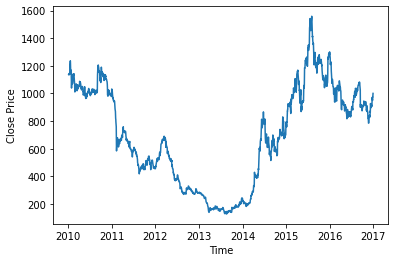

In [25]:
import matplotlib.pyplot as plt
plt.plot(beml_df.Close)
plt.xlabel('Time')
plt.ylabel('Close Price')

In [28]:
beml_df['Gain']=beml_df.Close.pct_change(periods=1)
beml_df
beml_df=beml_df.dropna()

In [31]:
import seaborn as sn


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

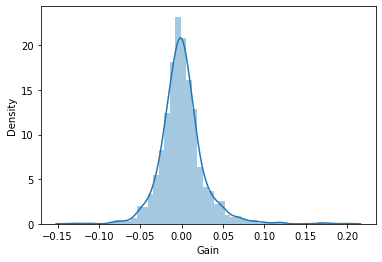

In [34]:
sn.distplot(beml_df.Gain,label='BEML');

plt.xlabel('Gain')
plt.ylabel('Density')

In [38]:
print(round(beml_df.Gain.mean(),4))
print(round(beml_df.Gain.std(),4))

0.0003
0.0264


In [48]:
from scipy import stats
#Probability of making 2% loss or higher in BEML
print(stats.norm.cdf(-0.02,beml_df.Gain.mean(),beml_df.Gain.std()))

#Probability of making 2% gain or higher in BEML
print(1-stats.norm.cdf(0.02,beml_df.Gain.mean(),beml_df.Gain.std()))

0.22155987503755292
0.22769829484075355
